# This is every visual present in calendar integration part B

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from functools import reduce
import matplotlib.patches as mpatches
from scipy.optimize import minimize
from scipy.stats import norm
from scipy import stats

In [2]:
cwd1 = os.getcwd() 

os.chdir('..')
cwd2 = os.getcwd()

graphics_folder = cwd2 + '/3. Graphics/'
data_path = cwd2 + '/Saved data/'
csv_path = cwd2 + '/0. Raw data/'
os.chdir(data_path)

In [4]:
ls

POR_1stStageClean.csv.gz
POR_approximated_neighs.csv
POR_cal_rev_list_FULLMERGE_10_days.csv.gz
Portland_cal_rev_list_FULLMERGEv4_10_days_before.csv.gz
rejoined_booked_df.csv
rejoined_booked_df.csv.gz


In [6]:
full_merge = pd.read_csv("Portland_cal_rev_list_FULLMERGEv4_10_days_before.csv.gz", low_memory=False)

In [7]:
full_merge.head(10)

,booked,id,res_date,never_avail,last_date,calendar_price,seen_avail,week_yr,mo_yr,List_month,...,room_type,neighbourhood,zipcode,free_park,pool,host_since,review_scores_rating,number_of_reviews,rev_active,composite_active
0,False,236108,2015-09-02,False,NaN,63.0,1,2015-35,2015-09,1.0,...,Private room,Sabin,97211.0,0.0,0.0,2011-04-11,90.0,41.0,1,1
1,False,134282,2015-09-02,True,NaN,NaN,0,2015-35,2015-09,1.0,...,Entire home/apt,Boise-Eliot,97227.0,0.0,0.0,2011-06-03,95.0,19.0,1,1
2,False,134282,2015-09-03,False,NaN,156.0,1,2015-35,2015-09,1.0,...,Entire home/apt,Boise-Eliot,97227.0,0.0,0.0,2011-06-03,95.0,19.0,1,1
3,False,236108,2015-09-03,False,NaN,63.0,1,2015-35,2015-09,1.0,...,Private room,Sabin,97211.0,0.0,0.0,2011-04-11,90.0,41.0,1,1
4,False,236108,2015-09-04,True,NaN,NaN,0,2015-35,2015-09,1.0,...,Private room,Sabin,97211.0,0.0,0.0,2011-04-11,90.0,41.0,1,1
5,False,134282,2015-09-04,True,NaN,NaN,0,2015-35,2015-09,1.0,...,Entire home/apt,Boise-Eliot,97227.0,0.0,0.0,2011-06-03,95.0,19.0,1,1
6,False,134282,2015-09-05,True,NaN,NaN,0,2015-35,2015-09,1.0,...,Entire home/apt,Boise-Eliot,97227.0,0.0,0.0,2011-06-03,95.0,19.0,1,1
7,False,236108,2015-09-05,True,NaN,NaN,0,2015-35,2015-09,1.0,...,Private room,Sabin,97211.0,0.0,0.0,2011-04-11,90.0,41.0,1,1
8,False,134282,2015-09-06,True,NaN,NaN,0,2015-36,2015-09,1.0,...,Entire home/apt,Boise-Eliot,97227.0,0.0,0.0,2011-06-03,95.0,19.0,1,1
9,False,236108,2015-09-06,True,NaN,NaN,0,2015-36,2015-09,1.0,...,Private room,Sabin,97211.0,0.0,0.0,2011-04-11,90.0,41.0,1,1


In [8]:
full_merge.columns

Index(['booked', 'id', 'res_date', 'never_avail', 'last_date',
       'calendar_price', 'seen_avail', 'week_yr', 'mo_yr', 'List_month',
       'Listlead1', 'Listlag1', 'headline_price', 'cleaning_fee',
       'host_listings_count', 'cum_sum', 'bedrooms', 'room_type',
       'neighbourhood', 'zipcode', 'free_park', 'pool', 'host_since',
       'review_scores_rating', 'number_of_reviews', 'rev_active',
       'composite_active'],
      dtype='object')

In [9]:
full_merge['res_date'] = full_merge['res_date'].astype('datetime64[ns]')

# Comparison of headline price and calendar price  

## One listing

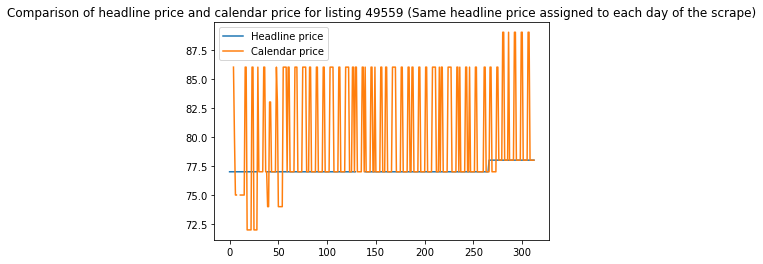

In [10]:
plt.plot(full_merge[full_merge['id'] == 53940]['headline_price'].values, label='Headline price')
plt.plot(full_merge[full_merge['id'] == 53940]['calendar_price'].values, label='Calendar price')
plt.legend()
plt.title("Comparison of headline price and calendar price for listing 49559 (Same headline price assigned to each day of the scrape)")
plt.show()

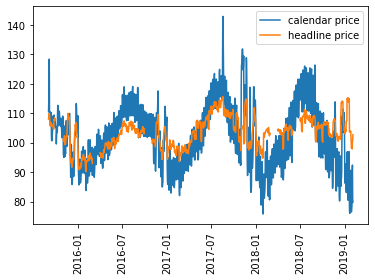

In [11]:
calendar_mean_price = full_merge.groupby('res_date')['calendar_price'].mean()
headline_mean_price = full_merge.groupby('res_date')['headline_price'].mean()

plt.plot(calendar_mean_price.index,
calendar_mean_price.values, label='calendar price')

plt.plot(headline_mean_price.index,
         headline_mean_price.values, label='headline price')

plt.xticks(rotation="vertical")
plt.legend()
plt.show()

# Full Merge Visualizations

In [12]:
avail_conds = (((full_merge['List_month'] == 1) | (full_merge['Listlead1'] == 1) | (full_merge['Listlag1'] == 1))
                      & (full_merge['composite_active'] == 1))

review_conds = (((full_merge['List_month'] == 1) | (full_merge['Listlead1'] == 1) | (full_merge['Listlag1'] == 1))
                      & (full_merge['rev_active'] == 1))

active_only_conditions = ((full_merge['composite_active'] == 1)) # Seen active takes the max of 'seen_avail' and 'rev_active'
rev_only_conditions = ((full_merge['rev_active'] == 1))
avail_only_conditions = ((full_merge['seen_avail'] == 1))

In [13]:
booking_sum = full_merge[avail_conds].groupby('res_date')['booked'].sum()

In [14]:
composite_supply = full_merge[active_only_conditions].groupby('res_date')['composite_active'].sum()
reviews_supply = full_merge[rev_only_conditions].groupby('res_date')['rev_active'].sum()
availability_supply = full_merge[avail_only_conditions].groupby('res_date')['seen_avail'].sum()

In [15]:
def event_lines():
    ax.axvspan(datetime.datetime(2018,10,5), datetime.datetime(2018,10,14), alpha=0.3, color='grey', label='Event days')
    ax.axvspan(datetime.datetime(2018,10,19), datetime.datetime(2018,10,21), alpha=0.3, color='grey')
    ax.axvspan(datetime.datetime(2019, 3, 8), datetime.datetime(2019, 3, 17), alpha=0.3, color='grey')
    ax.axvspan(datetime.datetime(2019, 10, 4), datetime.datetime(2019, 10, 13), alpha=0.3, color='grey')
    ax.axvspan(datetime.datetime(2019, 11, 1), datetime.datetime(2019, 11, 3), alpha=0.3, color='grey')

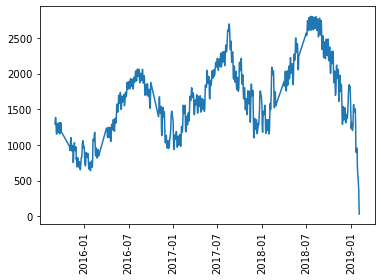

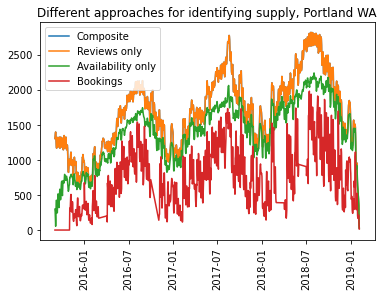

In [16]:
activity = full_merge[avail_conds].groupby('res_date')['composite_active'].sum()
fig, ax = plt.subplots()
plt.plot(activity.index, activity.values)
plt.xticks(rotation="vertical")
#event_lines()
plt.show()

fig, ax = plt.subplots()
plt.plot(composite_supply.index, composite_supply.values, label='Composite')
plt.plot(reviews_supply.index, reviews_supply.values, label='Reviews only')
plt.plot(availability_supply.index, availability_supply.values, label='Availability only')
plt.plot(booking_sum.index, booking_sum.values, label='Bookings')

plt.xticks(rotation="vertical")
plt.legend()
plt.title("Different approaches for identifying supply, Portland WA")
#event_lines()
plt.show()

513 513 513 513


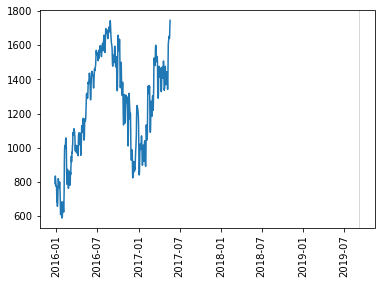

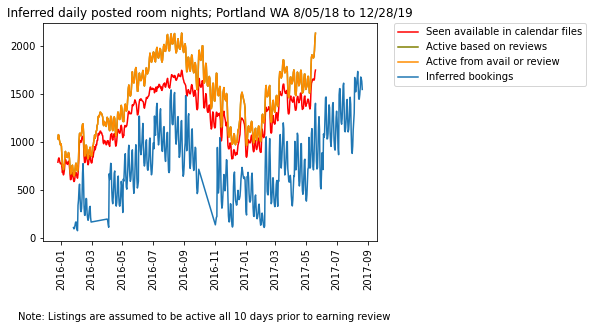

/var/folders/nx/l6t8st49137cl77yqnxy4z2m0000gn/T/ipykernel_65103/2530794002.py:60: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  quick_df.loc[:,'mon_week'] = quick_df['date'].dt.week


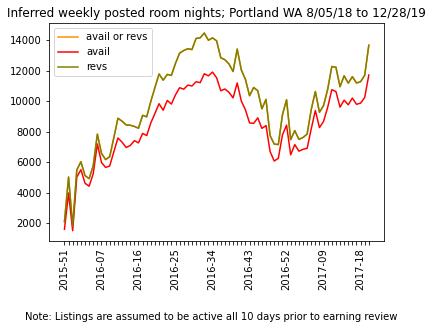

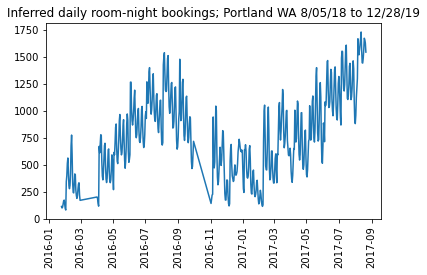

/var/folders/nx/l6t8st49137cl77yqnxy4z2m0000gn/T/ipykernel_65103/2530794002.py:119: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  quick_bookings.loc[:,'mon_week'] = quick_bookings[0].dt.week
No handles with labels found to put in legend.


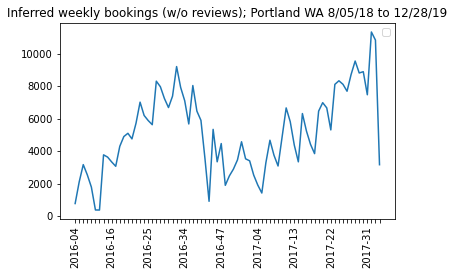

In [17]:
# ALL OF THIS CELL IS VISUALISATION

# Create smaller graphs

reduced_avail = availability_supply[114:627]
reduced_books = booking_sum[114:627]
reduced_revs = reviews_supply[114:627]
reduced_activity = composite_supply[114:627]

print(len(reduced_avail),len(reduced_books),
      len(reduced_revs),len(reduced_activity))

fig, ax = plt.subplots()

plt.plot(reduced_avail.index, reduced_avail.values)

#event_lines()
ax.axvspan(datetime.datetime(2019,9,6), datetime.datetime(2019,9,8), alpha=0.3, color='grey')

plt.xticks(rotation="vertical")
plt.show()

# ----------------------------

fig, ax = plt.subplots()

plt.plot(reduced_avail.index, reduced_avail.values, label='Seen available in calendar files', color='red')
plt.plot(reduced_revs.index, reduced_revs.values, label='Active based on reviews', color='olive')

plt.plot(reduced_activity.index, reduced_activity.values, label='Active from avail or review', color='darkorange')
plt.plot(reduced_books.index, reduced_books.values, label='Inferred bookings')

#event_lines()


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation="vertical")

plt.title("Inferred daily posted room nights; Portland WA 8/05/18 to 12/28/19")

note_txt = "Note: Listings are assumed to be active all 10 days prior to earning review"
fig.text(.5, -.15, note_txt, ha='center')
plt.show()

# ----------------------------

i = 0

my_labels= [ "avail or revs","avail","revs"] 
my_colors = ['darkorange', 'red','olive']

fig, ax = plt.subplots()

for my_df in [reduced_activity, reduced_avail, reduced_revs]: 
    
    quick_df = pd.DataFrame(np.sort(my_df.index.values))
    quick_df.columns = ['date']
    
    quick_df.loc[:,'year'] = quick_df['date'].dt.year
    quick_df.loc[:,'mon_week'] = quick_df['date'].dt.week
    quick_df.loc[:, 'sun_week'] = quick_df['date'].dt.strftime("%U")
    quick_df.loc[:, 'avail'] = my_df.values

    quick_df.columns = ['date', 'year','mon_week', 'sun_week', 'avail']

    quick_df.loc[:, 'week_yr'] = quick_df["year"].astype(str) + "-" + quick_df['sun_week'].astype(str)
    quick_df.loc[:, 'week_yr'] = quick_df['week_yr'].replace(['2019-00'], ['2018-52'])    
    quick_df = quick_df[(quick_df['week_yr'] != '2019-52')]
    
    plt.plot(quick_df.groupby('week_yr')['avail'].sum(), label=my_labels[i], color=my_colors[i])

    i+=1

#ax.axvspan("2018-39", "2018-41", alpha=0.3, color='grey', label='Event week') # ACL 2018
#ax.axvspan("2018-41", "2018-42", alpha=0.3, color='grey') # F1 2018
#ax.axvspan("2019-09", "2019-11", alpha=0.3, color='grey') # SXSW 2019
#ax.axvspan("2019-39", "2019-41", alpha=0.3, color='grey') # ACL 2019
#ax.axvspan("2019-43", "2019-44", alpha=0.3, color='grey') # F1 2019 
    
every_nth = 9
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

plt.title("Inferred weekly posted room nights; Portland WA 8/05/18 to 12/28/19")
plt.xticks(rotation="vertical")       
plt.legend()

note_txt = "Note: Listings are assumed to be active all 10 days prior to earning review"
fig.text(.5, -.15, note_txt, ha='center')

plt.show()

# ----------------------------

fig, ax = plt.subplots()

plt.plot(reduced_books.index, reduced_books.values)
plt.xticks(rotation="vertical")
# plt.ylim(0,11000)
plt.title("Inferred daily room-night bookings; Portland WA 8/05/18 to 12/28/19")

#event_lines()

# note_txt = "Note: Unlikely that this measure is particularly accurate w/o further information from reviews"
# fig_b.text(.5, .1, note_txt, ha='center')

plt.gcf().subplots_adjust(bottom=0.2)
# plt.savefig(os.path.join(graphics_folder, "daily_books" + ".png"))
plt.show()

# ----------------------------

fig, ax = plt.subplots()

quick_bookings = pd.DataFrame(np.sort(reduced_books.index.values))

quick_bookings.loc[:,'year'] = quick_bookings[0].dt.year
quick_bookings.loc[:,'mon_week'] = quick_bookings[0].dt.week
quick_bookings.loc[:, 'sun_week'] = quick_bookings[0].dt.strftime("%U")
quick_bookings.loc[:, 'bookings'] = reduced_books.values

quick_bookings.columns = ['date', 'year','mon_week', 'sun_week', 'bookings']

quick_bookings.loc[:, 'week_yr'] = quick_bookings["year"].astype(str) + "-" + quick_bookings['sun_week'].astype(str)
quick_bookings.loc[:, 'week_yr'] = quick_bookings['week_yr'].replace(['2019-00'], ['2018-52'])    

plt.plot(quick_bookings.groupby('week_yr')['bookings'].sum())

i+=1

#ax.axvspan("2018-39", "2018-41", alpha=0.3, color='grey', label='Event week') # ACL 2018
#ax.axvspan("2018-41", "2018-42", alpha=0.3, color='grey') # F1 2018
#ax.axvspan("2019-09", "2019-11", alpha=0.3, color='grey') # SXSW 2019
#ax.axvspan("2019-39", "2019-41", alpha=0.3, color='grey') # ACL 2019
#ax.axvspan("2019-43", "2019-44", alpha=0.3, color='grey') # F1 2019 
    
every_nth = 9
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

plt.title("Inferred weekly bookings (w/o reviews); Portland WA 8/05/18 to 12/28/19")
plt.xticks(rotation="vertical")       
plt.legend()
# plt.ylim(0, 50000)

# note_txt = "Note: "
# fig.text(.5, -.15, note_txt, ha='center')

plt.gcf().subplots_adjust(bottom=0.2)
# plt.savefig(os.path.join(graphics_folder, "weekly_books" + ".png"))
plt.show()

In [18]:
dates = reduced_books.index.values
book_months = pd.to_datetime(dates).to_period('M')
books = reduced_books.values

df_Mbooks = pd.DataFrame([dates, book_months, books]).T
df_Mbooks.columns = ['date', 'yr_mo', 'books']

month_books_graph = df_Mbooks.groupby('yr_mo')['books'].sum()

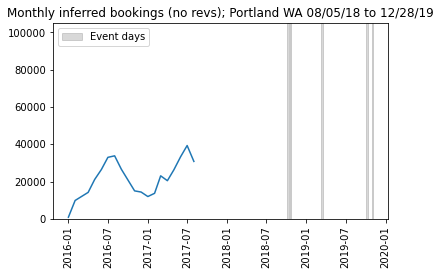

In [19]:
# ALL OF THIS CELL IS VISUALISATION

# Monthly room-night bookings fig

fig, ax = plt.subplots()

plt.plot(month_books_graph.index.astype('datetime64'), 
        month_books_graph.values)

event_lines()
# ax3.axvspan("2019-03", "2019-03", color='grey',alpha=0.5, linestyle='--', linewidth=2, label='Event month')
# ax3.axvspan("2018-10", "2018-10", color='grey',alpha=0.5,linestyle='--', linewidth=2)
# ax3.axvspan("2019-10", "2019-10", color='grey',alpha=0.5,linestyle='--', linewidth=2)
# ax3.axvspan("2019-11", "2019-11", color='grey',alpha=0.5, linestyle='--', linewidth=2)

plt.xticks(rotation="vertical") 
plt.title("Monthly inferred bookings (no revs); Portland WA 08/05/18 to 12/28/19")
plt.ylim(0, 105000)
plt.legend()
plt.gcf().subplots_adjust(bottom=0.2)
plt.savefig(os.path.join(graphics_folder, "monthly_books" + ".png"))
plt.show()

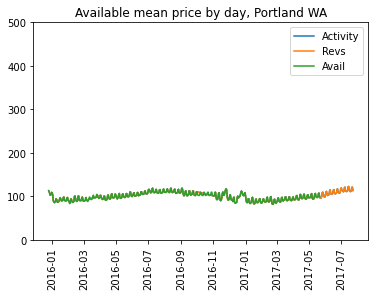

In [20]:
# ALL OF THIS CELL IS VISUALISATION

# I probably want to copy the room_types for listings over time.

price_graph = full_merge[avail_conds].groupby('res_date')['calendar_price'].mean()[84:598]
price_graph_rev = full_merge[review_conds].groupby('res_date')['calendar_price'].mean()[84:598]
price_graph_avail = full_merge[active_only_conditions].groupby('res_date')['calendar_price'].mean()[114:628]

plt.plot(price_graph.index, price_graph.values, label='Activity')
plt.plot(price_graph_rev.index, price_graph_rev.values, label='Revs')
plt.plot(price_graph_avail.index, price_graph_avail.values, label='Avail')

plt.xticks(rotation="vertical")
plt.title("Available mean price by day, Portland WA")
plt.legend()
plt.ylim(0, 500)
plt.show()

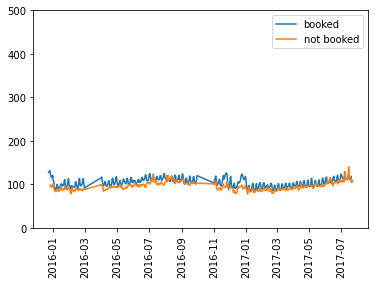

In [21]:
# ALL OF THIS CELL IS VISUALISATION

booked_price = full_merge[(avail_conds) & (full_merge['booked'] == 1)].groupby('res_date')['calendar_price'].mean()[51:565]
not_booked_price = full_merge[(avail_conds) & (full_merge['booked'] == 0)].groupby('res_date')['calendar_price'].mean()[84:598]

plt.plot(booked_price.index, booked_price.values, label='booked')
plt.plot(not_booked_price.index, not_booked_price.values, label='not booked')
plt.legend()
plt.xticks(rotation="vertical")
plt.ylim(0, 500)
plt.show()

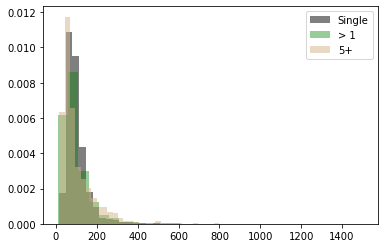

In [22]:
# ALL OF THIS CELL IS VISUALISATION

# Set-up my histograms

N_bins = 30

counts_mult,bins_mult = np.histogram(full_merge[(full_merge['bedrooms'] <= 5) & (full_merge['cum_sum'] > 1) & 
                                                (full_merge['calendar_price'] <= 2000) & (full_merge['res_date'] >= '2018-08-05') 
                                                & (full_merge['res_date'] <= '2019-12-31')]['calendar_price'], bins=N_bins)


counts_large,bins_large = np.histogram(full_merge[(full_merge['bedrooms'] <= 5) & (full_merge['cum_sum'] > 5) & 
                                                (full_merge['calendar_price'] <= 2000) & (full_merge['res_date'] >= '2018-08-05') 
                                                & (full_merge['res_date'] <= '2019-12-31')]['calendar_price'], bins=N_bins)



counts_sing, bins_sing = np.histogram(full_merge[(full_merge['bedrooms'] <= 5) & (full_merge['cum_sum'] == 1) & 
                                                 (full_merge['calendar_price'] <= 2000) & (full_merge['res_date'] >= '2018-08-05') 
                                                & (full_merge['res_date'] <= '2019-12-31')]['calendar_price'], bins=N_bins)
# -----------------------------------
# Graph hist

plt.hist(bins_sing[:-1], bins_sing, weights=counts_sing, density=True, label='Single', color='k', alpha=.5)
plt.hist(bins_mult[:-1], bins_mult, weights=counts_mult, density=True, label='> 1', color='green',alpha=.4)
plt.hist(bins_large[:-1], bins_large, weights=counts_large, density=True, label='5+', color='tan', alpha=.5)
plt.legend()
plt.show()

In [23]:
# I prefer avail_conditions, it combines rev_active, seen_avail and listings panel information 
# I CHANGE SOME STUFF HERE! 

avail_conds = (((full_merge['List_month'] == 1) | (full_merge['Listlead1'] == 1) | (full_merge['Listlag1'] == 1))
                      & (full_merge['composite_active'] == 1))

review_conds = (((full_merge['List_month'] == 1) | (full_merge['Listlead1'] == 1) | (full_merge['Listlag1'] == 1))
                      & (full_merge['rev_active'] == 1))

active_only_conditions = ((full_merge['composite_active'] == 1)) # Seen active takes the max of 'seen_avail' and 'rev_active'
rev_only_conditions = ((full_merge['rev_active'] == 1))
avail_only_conditions = ((full_merge['seen_avail'] == 1))

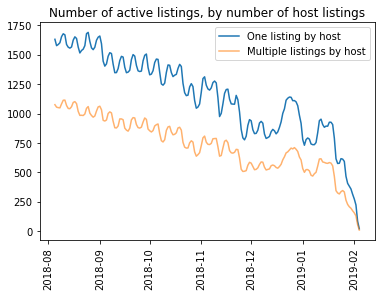

In [24]:
sing_activ = full_merge[(avail_conds) & (full_merge['cum_sum'] == 1) & (full_merge['res_date'] >= '2018-08-05') 
                                                & (full_merge['res_date'] <= '2019-12-31')].groupby('res_date')['composite_active'].sum()

multi_activ = full_merge[(avail_conds) & (full_merge['cum_sum'] > 1) & (full_merge['res_date'] >= '2018-08-05') 
                                                & (full_merge['res_date'] <= '2019-12-31')].groupby('res_date')['composite_active'].sum()

plt.plot(sing_activ.index, sing_activ.values, 
         label='One listing by host')

plt.plot(multi_activ.index, multi_activ.values, alpha=.6,
        label="Multiple listings by host")

plt.legend()
plt.xticks(rotation="vertical")
plt.title("Number of active listings, by number of host listings")
plt.show()

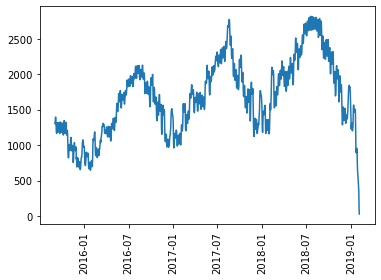

In [25]:
full_merge_test = full_merge.drop_duplicates()
quick_mask = ((full_merge_test['composite_active'] == 1)) # Seen active takes the max of 'seen_avail' and 'rev_active'
new_activity = full_merge_test[quick_mask].groupby('res_date')['composite_active'].sum()
fig, ax = plt.subplots()
plt.plot(new_activity.index, new_activity.values)
plt.xticks(rotation="vertical")
#event_lines()
plt.show()

In [26]:
avail_conds_save = (((full_merge['List_month'] == 1) | (full_merge['Listlead1'] == 1) | (full_merge['Listlag1'] == 1)))

raw = full_merge[avail_conds_save
                       & (full_merge['res_date'] <= "2019-12-31")].groupby('res_date')['composite_active'].sum()

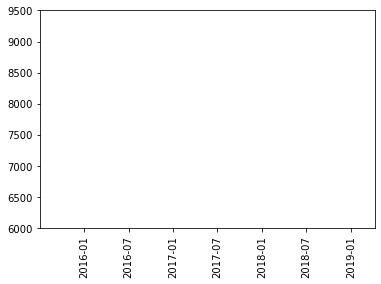

In [27]:
fig, ax = plt.subplots()
plt.plot(raw.index, raw.values)
plt.xticks(rotation="vertical")
#event_lines()
plt.ylim(6000, 9500)
plt.show()

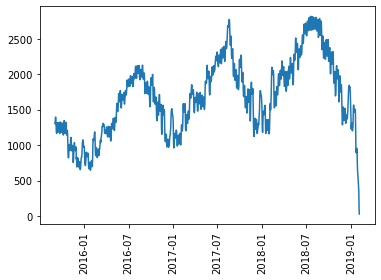

In [28]:
new_activity_conditions = (full_merge['composite_active'] == 1) # Seen active takes the max of 'seen_avail' and 'rev_active'
new_activity = full_merge[new_activity_conditions].groupby('res_date')['composite_active'].sum()
fig, ax = plt.subplots()
plt.plot(new_activity.index, new_activity.values)
plt.xticks(rotation="vertical")
#event_lines()
plt.show()

# Revenue Data Graphs

In [29]:
os.chdir(csv_path)
uniq_revs = pd.read_csv('Revs_Portland.csv.gz', compression='gzip') 
os.chdir(data_path)

FileNotFoundError: [Errno 2] No such file or directory: 'Revs_Portland.csv.gz'

In [30]:
revs_graph = uniq_revs.copy()

revs_graph.loc[:, 'date'] = revs_graph['date'].astype('datetime64')
dummy = revs_graph

months = dummy['date'].values.astype('datetime64[M]')
weeks = dummy['date'].values.astype('datetime64[W]').astype('datetime64[ns]')

dummy.loc[:, 'dt_week'] = weeks
dummy.loc[:, 'month'] = dummy['date'].dt.to_period('M')

dates_mask = ((dummy['date'].astype('datetime64[D]') >= '2018-08-05') 
& (dummy['date'].astype('datetime64[D]') < '2019-12-28'))

dummy_short = dummy[dates_mask]

dummy_short.loc[:, "year"] = dummy_short['date'].dt.year
dummy_short.loc[:, 'week'] = dummy_short['date'].dt.strftime("%U")
dummy_short.loc[:, 'day'] = dummy_short['date'].dt.day

dummy_short = dummy_short.sort_values(by=['date', 'listing_id']).reset_index(drop=True)
dummy_short = dummy_short.drop(columns=['Unnamed: 0'])
dummy_short.loc[:, 'week_yr'] = dummy_short['year'].astype(str) + "-" + dummy_short['week'].astype(str)
dummy_short.loc[:, 'week_yr'] = dummy_short['week_yr'].replace(['2019-00'], ['2018-52'])
dummy_short.head(5)

NameError: name 'uniq_revs' is not defined

NameError: name 'dummy_short' is not defined

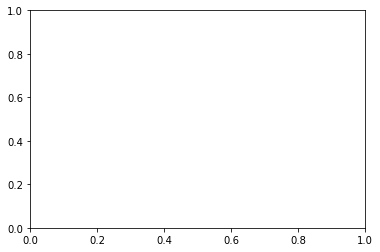

In [31]:
# --------- DAILY A --------- #

fig, ax = plt.subplots()

day_groups = dummy_short.groupby('date')['id'].count()

plt.plot(day_groups.index,
        day_groups.values)

event_lines()

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title("Reviews per day; Portland, WA 8/05/18 to 12/28/19")
plt.legend()
plt.xticks(rotation="vertical")
plt.ylim(0, 2000)
plt.gcf().subplots_adjust(bottom=0.2)

# plt.savefig(os.path.join(graphics_folder, "daily_revsA" + ".png"))
plt.show()


# --------- DAILY B --------- #

fig, ax = plt.subplots()

day_groups = dummy_short.groupby('date')['id'].count()

plt.plot(day_groups.index,
        day_groups.values)

event_lines()

plt.title("Reviews per day; Portland, WA 8/05/18 to 12/28/19")
plt.gcf().subplots_adjust(bottom=0.2)
plt.legend()
plt.xticks(rotation="vertical")
plt.ylim(0, 2000)

# plt.savefig(os.path.join(graphics_folder, "daily_revsB" + ".png"))
plt.show()

# --------- WEEKLY A --------- #

fig, ax = plt.subplots()

sun_start = dummy_short.groupby('week_yr')['id'].count()

plt.plot(sun_start.index, sun_start.values)

# ax.axvspan("2018-09", "2018-11", alpha=0.4, color='grey') # SXSW 2018
ax.axvspan("2018-39", "2018-41", alpha=0.4, color='grey', label='Event week') # ACL 2018
ax.axvspan("2018-41", "2018-42", alpha=0.4, color='grey') # F1 2018
ax.axvspan("2019-09", "2019-11", alpha=0.4, color='grey') # SXSW 2019
ax.axvspan("2019-39", "2019-41", alpha=0.4, color='grey') # ACL 2019
ax.axvspan("2019-43", "2019-44", alpha=0.4, color='grey') # F1 2019

every_nth = 9
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

plt.xticks(rotation="vertical")
plt.title("Reviews per week (Sunday 1st dow); Portland, WA 8/05/18 to 12/28/19")
plt.ylim(0, 5500)
plt.legend()

plt.gcf().subplots_adjust(bottom=0.2)
plt.savefig(os.path.join(graphics_folder, "weekly_revsA" + ".png"))
plt.show()

# --------- WEEKLY B --------- #

fig, ax = plt.subplots()

sun_start = dummy_short.groupby('week_yr')['id'].count()

plt.plot(sun_start.index, sun_start.values)

# ax.axvspan("2018-09", "2018-11", alpha=0.4, color='grey') # SXSW 2018
# ax.axvspan("2018-09", "2018-11", alpha=0.4, color='grey') # SXSW 2018

ax.axvspan("2018-39", "2018-41", alpha=0.4, color='grey', label="Event week") # ACL 2018
ax.axvspan("2018-41", "2018-42", alpha=0.4, color='grey') # F1 2018
ax.axvspan("2018-42", "2018-44", alpha=0.2, color='red', label='Event review window') # ACL 2018

ax.axvspan("2019-09", "2019-11", alpha=0.4, color='grey') # SXSW 2019
ax.axvspan("2019-11", "2019-12", alpha=0.2, color='red') # SXSW 2019

ax.axvspan("2019-39", "2019-41", alpha=0.4, color='grey') # ACL 2019
ax.axvspan("2019-41", "2019-43", alpha=0.2, color='red') # SXSW 2019

ax.axvspan("2019-43", "2019-44", alpha=0.4, color='grey') # F1 2019
ax.axvspan("2019-44", "2019-46", alpha=0.2, color='red') # SXSW 2019

every_nth = 9
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

plt.legend()
plt.xticks(rotation="vertical")
plt.title("Reviews per week (Sunday 1st dow); Portland, WA 8/05/18 to 12/28/19")
plt.ylim(0, 5500)

plt.gcf().subplots_adjust(bottom=0.2)
plt.savefig(os.path.join(graphics_folder, "weekly_revsB" + ".png"))

plt.show()

# --------- MONTHLY --------- #

fig, ax1 = plt.subplots()
plt.plot(dummy_short.groupby('month')['listing_id'].count().index.astype(str),
         dummy_short.groupby('month')['listing_id'].count().values)

ax1.axvspan("2019-03", "2019-03", color='grey',alpha=0.5, linestyle='--', linewidth=2, label='Event month')
ax1.axvspan("2018-10", "2018-10", color='grey',alpha=0.5,linestyle='--', linewidth=2)
ax1.axvspan("2019-10", "2019-10", color='grey',alpha=0.5,linestyle='--', linewidth=2)
ax1.axvspan("2019-11", "2019-11", color='grey',alpha=0.5, linestyle='--', linewidth=2)

plt.title("Reviews per month; Portland, WA 8/05/18 to 12/28/19")
plt.xticks(rotation="vertical")
plt.legend()
plt.ylim(0, 20000)

plt.gcf().subplots_adjust(bottom=0.2)
# plt.savefig(os.path.join(graphics_folder, "monthly_revsA" + ".png"))
plt.show()

# In critical windows

event_wins = dummy_short[((dummy_short['date'] >= '2018-10-05') & (dummy_short['date'] <= '2018-11-04')) | 
((dummy_short['date'] >= '2019-03-08') & (dummy_short['date'] <= '2019-03-31')) |
((dummy_short['date'] >= '2019-10-04') & (dummy_short['date'] <= '2019-10-27') )|
((dummy_short['date'] >= '2019-11-01') & (dummy_short['date'] <= '2019-11-17') ) ]

# ACL 2018 Oct 5-Oct 7, Oct 12 - Oct14
# F1 2018 Oct 19 - Oct 21
# SXSW 2019 Mar 8 - Mar 17
# ACL 2019 Oct 4-Oct6, Oct 11-Oct 13
# F1 2019 Nov 1- Nov 3

event_wins_norev = dummy_short[((dummy_short['date'] >= '2018-10-05') & (dummy_short['date'] <= '2018-10-08')) | 
((dummy_short['date'] >= '2018-10-12') & (dummy_short['date'] <= '2018-10-15'))  |
((dummy_short['date'] >= '2018-10-19') & (dummy_short['date'] <= '2018-10-22'))  |
((dummy_short['date'] >= '2019-03-08') & (dummy_short['date'] <= '2019-03-14') ) |
((dummy_short['date'] >= '2019-10-04') & (dummy_short['date'] <= '2019-10-07') ) |
((dummy_short['date'] >= '2019-10-11') & (dummy_short['date'] <= '2019-10-14') ) |
((dummy_short['date'] >= '2019-11-01') & (dummy_short['date'] <= '2019-11-04') )]

# Events and review windows share of reviews and share of days

print(round(len(event_wins)/len(dummy_short),3), round(len(event_wins.date.unique())/len(dummy_short.date.unique()),3))

# Events (only) share of reviews and share of days

print(round(len(event_wins_norev)/len(dummy_short),3), round(len(event_wins_norev.date.unique())/len(dummy_short.date.unique()),3))

# More Data Analysis

README.md                    united-states_san-francisco/
united-states_portland/


In [39]:
booked_df = pd.read_csv('united-states_portland/rejoined_booked_df.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'united-states_portland/rejoined_booked_df.csv'

In [33]:
booked_df['date'] = booked_df['date'].astype('datetime64')

NameError: name 'booked_df' is not defined

In [34]:
booked_df.columns

NameError: name 'booked_df' is not defined

In [35]:
plt.plot(booked_df[booked_df['seen_avail']==False].groupby('date')['price'].mean())
plt.show()

seen_avail = booked_df[booked_df['seen_avail']==False].groupby('date')['seen_avail'].sum()

plt.plot(seen_avail.values)
plt.show()

NameError: name 'booked_df' is not defined

In [36]:
# Here I'm trying to get a sense of supply for different dates

avail_df = booked_df[(booked_df['seen_avail'] == False)]
available = avail_df.groupby('date')['seen_avail'].count()

fig, ax = plt.subplots()

ax.plot(avail_df.groupby('date')['price'].mean().index.astype('datetime64'),
    avail_df.groupby('date')['price'].mean().values)

legend = mpatches.Patch(color='red', alpha=0.2, label='SXSW, ACL and Formula 1')
plt.legend(handles=[legend])
plt.xticks(rotation="vertical")

ax.axvspan("2018-10-05", "2018-10-07", alpha=0.2, color='red')
ax.axvspan("2018-10-12", "2018-10-14", alpha=0.2, color='red')
ax.axvspan("2018-10-19", "2018-10-21", alpha=0.2, color='red')
ax.axvspan("2019-03-08", "2019-03-17", alpha=0.2, color='red')
plt.title("Mean nightly price of available Airbnb listings in Portland")
plt.gcf().subplots_adjust(bottom=0.2)
plt.savefig(os.path.join(graphics_folder, "Portland_price_flex" + ".png"))

plt.show()

NameError: name 'booked_df' is not defined

In [37]:
plt.plot(available)
plt.show()

NameError: name 'available' is not defined

In [57]:
actual_bookings = booked_df[booked_df['book_status'] == True]

plt.plot(actual_bookings.groupby('date')['price'].mean().index.astype('datetime64'), 
         actual_bookings.groupby('date')['price'].mean().values)
plt.ylim(0, 600)
plt.xticks(rotation="vertical")
plt.show()

actual_bookings.loc[:, 'date'] = actual_bookings['date'].astype('datetime64')

TypeError: Cannot cast DatetimeIndex to dtype

In [ ]:
night_bookings = actual_bookings.groupby('date')['book_status'].sum()

plt.plot(night_bookings.index, 
night_bookings.values)
plt.ylim(0, 5000)
plt.xticks(rotation="vertical")
plt.show()

In [ ]:
mean_price = actual_bookings.groupby('date')[['price', 'id']].mean()
bookings_sum = actual_bookings.groupby('date')[['book_status', 'id']].sum()

mean_price.reset_index(inplace=True)
grouped_data = mean_price.drop(columns='id')

grouped_data.loc[:, 'sum_books'] = bookings_sum['book_status'].values